In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/data.csv", index_col=0)
labels = pd.read_csv("data/labels.csv", index_col=0)

In [3]:
data.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [4]:
scaler = StandardScaler()
X =scaler.fit_transform(data)

In [5]:
scores = []
for k in range(1,11):
    model = KMeans(n_clusters=k, random_state=99)
    model.fit(X)

    scores.append(model.inertia_)
    del model


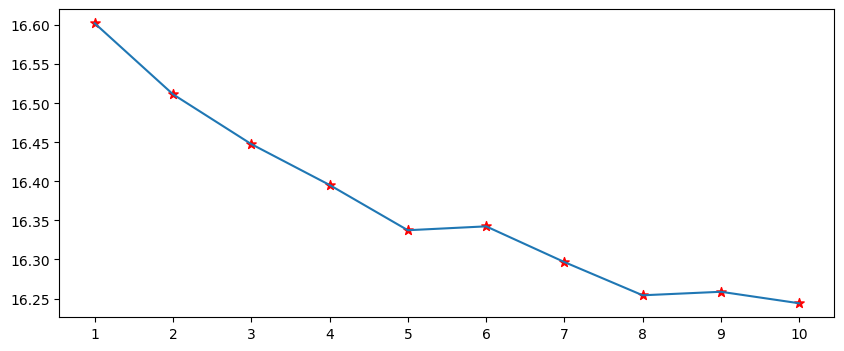

In [6]:
plt.figure(figsize=(10,4))
plt.plot(range(1,11), np.log(scores))
plt.scatter(range(1,11), np.log(scores), s=50, marker="*", c="red")
plt.xticks(range(1,11))
plt.show()

In [7]:
## Kmeans model

In [8]:
kmeans_model = KMeans(n_clusters=5, init="k-means++", random_state=999)
kmeans_model.fit(X)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,999
,copy_x,True
,algorithm,'lloyd'


In [9]:
kmeans_model.inertia_

12197294.201629212

In [10]:
y_pred = kmeans_model.labels_

In [11]:
from sklearn.metrics import silhouette_score
sc = silhouette_score(X, y_pred)

In [12]:
sc

0.13507290311138614

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X)  

In [15]:
n_components = X_pca.shape[1]  
print(f"PCA reduced {data.shape[1]} features to {n_components} components")

PCA reduced 20531 features to 530 components


In [16]:
scores = []
for k in range(1,11):
    model = KMeans(n_clusters=k, random_state=99)
    model.fit(X_pca)

    scores.append(model.inertia_)
    del model

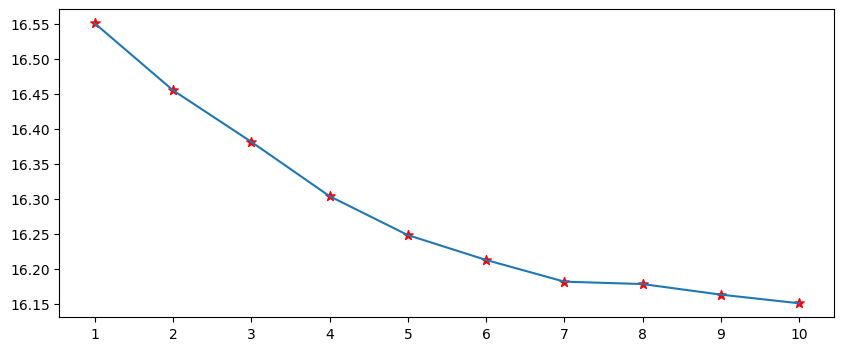

In [17]:
plt.figure(figsize=(10,4))
plt.plot(range(1,11), np.log(scores))
plt.scatter(range(1,11), np.log(scores), s=50, marker="*", c="red")
plt.xticks(range(1,11))
plt.show()

In [18]:
kmeans_model1 = KMeans(n_clusters=5, init="k-means++", random_state=999)
kmeans_model1.fit(X_pca)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,999
,copy_x,True
,algorithm,'lloyd'


In [19]:
kmeans_model1.inertia_

11391303.481367711

In [20]:
y_pred_pca = kmeans_model1.labels_
sc1 = silhouette_score(X_pca, y_pred_pca)

In [21]:
sc1 = silhouette_score(X_pca, y_pred_pca)

In [22]:
sc1

0.14396092127092153

In [23]:
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score,
    adjusted_rand_score, normalized_mutual_info_score,
    homogeneity_score, completeness_score, v_measure_score
)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [24]:
# Convert true labels (e.g., BRCA, COAD) to numbers for ARI
le = LabelEncoder()
y_true = le.fit_transform(labels['Class'])  # Assumes 'Class' column

In [25]:
# Get cluster labels from both KMeans models
y_pred_orig = kmeans_model.labels_  # Original data clusters
y_pred_pca = kmeans_model1.labels_  # PCA data clusters

In [26]:
# Calculate metrics: inertia (cluster tightness), silhouette (cluster quality), ARI (matches true labels)
metrics = {
    'Original': {
        'Inertia': kmeans_model.inertia_,
        'Silhouette': silhouette_score(X, y_pred_orig),
        'ARI': adjusted_rand_score(y_true, y_pred_orig)
    },
    'PCA': {
        'Inertia': kmeans_model1.inertia_,
        'Silhouette': silhouette_score(X_pca, y_pred_pca),
        'ARI': adjusted_rand_score(y_true, y_pred_pca)
    }
}

# Show comparison table
print("Clustering Comparison:")
print(pd.DataFrame(metrics).round(3).to_string())

Clustering Comparison:
                Original           PCA
Inertia     1.219729e+07  1.139130e+07
Silhouette  1.350000e-01  1.440000e-01
ARI         7.940000e-01  7.650000e-01


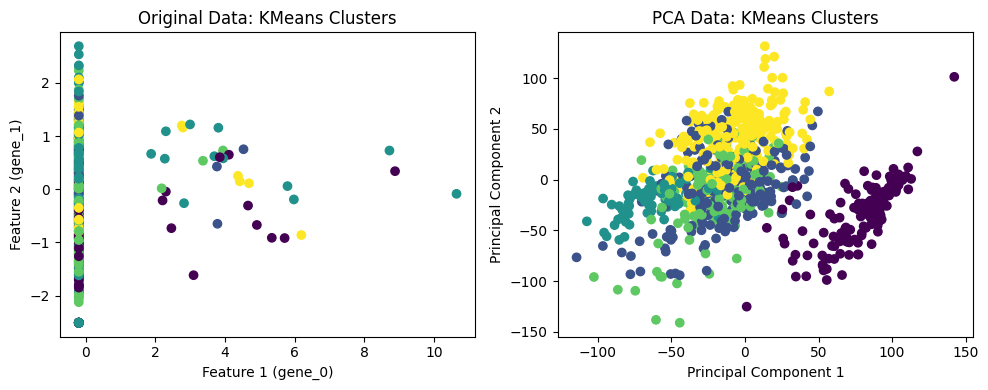

In [29]:
# Import plotting library
import matplotlib.pyplot as plt

# Get cluster labels from both KMeans models
y_pred_orig = kmeans_model.labels_  # Clusters for original data
y_pred_pca = kmeans_model1.labels_  # Clusters for PCA data

# Create side-by-side scatter plots
plt.figure(figsize=(10, 4))

# Plot 1: Original data (using first two features for visualization)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_orig, cmap='viridis')
plt.title('Original Data: KMeans Clusters')
plt.xlabel('Feature 1 (gene_0)')
plt.ylabel('Feature 2 (gene_1)')

# Plot 2: PCA data (using first two principal components)
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_pca, cmap='viridis')
plt.title('PCA Data: KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()